In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline


In [25]:
#Dependents 缺失值取平均
data = pd.read_csv("C:/Users/asd11/OneDrive/桌面/貸款模型預測/train_ctrUa4K.csv")

gender = []
for i in data["Gender"] :
    if i == 'Female' :
        gender.append('0')
    elif i == 'Male' :
        gender.append('1')
    else :
        gender.append(np.nan)
data['Gender'] = gender

married = []
for i in data["Married"] :
    if i == 'No' :
        married.append('0')
    elif i == 'Yes' :
        married.append('1')
    else :
        married.append(np.nan)
data['Married'] = married

Edu = []
for i in data["Education"] :
    if i == 'Graduate' :
        Edu.append('1')
    else :
        Edu.append('0')
data['Education'] = Edu

self_employee = []
for i in data["Self_Employed"] :
    if i == 'Yes' :
        self_employee.append('1')
    elif i == 'No' :
        self_employee.append('0')
    else :
        self_employee.append(np.nan)
data["Self_Employed"] = self_employee

area = []
for i in data["Property_Area"] :
    if i == 'Urban' :
        area.append('2')
    elif i == 'Semiurban' :
        area.append('1')
    else :
        area.append('0')
data["Property_AreaId"] = area

dep = []
for i in data["Dependents"] :
    if i == '0' :
        dep.append(0)
    elif i == '1' :
        dep.append(1)
    elif i == '2' :
        dep.append(2)
    elif i == '3+' :
        dep.append(3)
    else :
        dep.append(np.nan)
data["Dependents"] = dep

his = []
for i in data["Credit_History"] :
    if i == 1.0 :
        his.append(1)
    elif i == 0.0 :
        his.append(0)
    else :
        his.append(1)
data["Credit_History"] = his

#未婚育兒的失敗率較高
unmar_dep = []
for i in data['Married'] :
    if i == '0' :
        unmar_dep.append('1')
    else :
        unmar_dep.append('0')
for i in range(len(data['Dependents'])) :
    if data['Dependents'].loc[i] == 0 :
        unmar_dep[i] = '0'
data['unmar_dep'] = unmar_dep

#未畢業居住鄉村的失敗率較高
unedu_rural = []
for i in data['Education'] :
    if i == '0' :
        unedu_rural.append('1')
    else :
        unedu_rural.append('0')
for i in range(len(data['Property_AreaId'])) :
    if data['Property_AreaId'].loc[i] == '1' or data['Property_AreaId'].loc[i] == '2' :
        unedu_rural[i] = '0'
data['unedu_rural'] = unedu_rural

#結婚住郊區成功率高
marr_sub = []
mar = data['Married']=='1'
sub = data['Property_AreaId']=='1'
dataset = data[mar & sub]
Loan_ID = []
for i in dataset['Loan_ID'] :
    Loan_ID.append(i)
for i in data['Loan_ID'] :
    if i not in Loan_ID :
        marr_sub.append('0')
    else :
        marr_sub.append('1')
data['marr_sub'] = marr_sub

#處理Gender的缺失值
data['Gender'].value_counts()
data['Gender'] = data['Gender'].fillna('1')

#處理Married的缺失值
data['Married'].value_counts()
data['Married'] = data['Married'].fillna('1')


#缺失值取1
data['Dependents'] = data['Dependents'].fillna(data['Dependents'].mean())

#處理Self_Employed的缺失值
data['Self_Employed'].value_counts()
data['Self_Employed'] = data['Self_Employed'].fillna('0')

#處理loan amount 的缺失值
data['LoanAmount'].value_counts()
#取平均值
data['LoanAmount'] = data['LoanAmount'].fillna(data['LoanAmount'].mean())

#處理Loan_Amount_Term缺失值
data['Loan_Amount_Term'].value_counts()
#取平均值
data['Loan_Amount_Term'] = data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mean())

#處理Credit_History缺失值
data['Credit_History'].value_counts()
#取1
data['Credit_History'] = data['Credit_History'].fillna('1')

data['Loan_ID'] = data['Loan_ID'].astype('category')
data['Gender'] = data['Gender'].astype('category')
data['Married'] = data['Married'].astype('category')
data['Dependents'] = data['Dependents'].astype(float)
data['Education'] = data['Education'].astype('category')
data['Self_Employed'] = data['Self_Employed'].astype('category')
data['Property_Area'] = data['Property_Area'].astype('category')
data['Loan_Status'] = data['Loan_Status'].astype('category')
data['Property_AreaId'] = data['Property_AreaId'].astype('category')

In [26]:
#自定義函式
def standard(data) :
    gender = []
    for i in data["Gender"] :
        if i == 'Female' :
            gender.append('0')
        elif i == 'Male' :
            gender.append('1')
        else :
            gender.append(np.nan)
    data['Gender'] = gender

    married = []
    for i in data["Married"] :
        if i == 'No' :
            married.append('0')
        elif i == 'Yes' :
            married.append('1')
        else :
            married.append(np.nan)
    data['Married'] = married

    Edu = []
    for i in data["Education"] :
        if i == 'Graduate' :
            Edu.append('1')
        else :
            Edu.append('0')
    data['Education'] = Edu

    self_employee = []
    for i in data["Self_Employed"] :
        if i == 'Yes' :
            self_employee.append('1')
        elif i == 'No' :
            self_employee.append('0')
        else :
            self_employee.append(np.nan)
    data["Self_Employed"] = self_employee

    area = []
    for i in data["Property_Area"] :
        if i == 'Urban' :
            area.append('2')
        elif i == 'Semiurban' :
            area.append('1')
        else :
            area.append('0')
    data["Property_AreaId"] = area

    dep = []
    for i in data["Dependents"] :
        if i == '0' :
            dep.append(0)
        elif i == '1' :
            dep.append(1)
        elif i == '2' :
            dep.append(2)
        elif i == '3+' :
            dep.append(3)
        else :
            dep.append(np.nan)
    data["Dependents"] = dep

    his = []
    for i in data["Credit_History"] :
        if i == 1.0 :
            his.append(1)
        elif i == 0.0 :
            his.append(0)
        else :
            his.append(1)
    data["Credit_History"] = his
    
    #未婚育兒的失敗率較高
    unmar_dep = []
    for i in data['Married'] :
        if i == '0' :
            unmar_dep.append('1')
        else :
            unmar_dep.append('0')
    for i in range(len(data['Dependents'])) :
        if data['Dependents'].loc[i] == 0 :
            unmar_dep[i] = '0'
    data['unmar_dep'] = unmar_dep

    #未畢業居住鄉村的失敗率較高
    unedu_rural = []
    for i in data['Education'] :
        if i == '0' :
            unedu_rural.append('1')
        else :
            unedu_rural.append('0')
    for i in range(len(data['Property_AreaId'])) :
        if data['Property_AreaId'].loc[i] == '1' or data['Property_AreaId'].loc[i] == '2' :
            unedu_rural[i] = '0'
    data['unedu_rural'] = unedu_rural
    
    #結婚住郊區成功率高
    marr_sub = []
    mar = data['Married']=='1'
    sub = data['Property_AreaId']=='1'
    dataset = data[mar & sub]
    Loan_ID = []
    for i in dataset['Loan_ID'] :
        Loan_ID.append(i)
    for i in data['Loan_ID'] :
        if i not in Loan_ID :
            marr_sub.append('0')
        else :
            marr_sub.append('1')
    data['marr_sub'] = marr_sub

    data['Loan_ID'] = data['Loan_ID'].astype('category')
    data['Gender'] = data['Gender'].astype('category')
    data['Married'] = data['Married'].astype('category')
    data['Dependents'] = data['Dependents'].astype(float)
    data['Education'] = data['Education'].astype('category')
    data['Self_Employed'] = data['Self_Employed'].astype('category')
    data['Property_Area'] = data['Property_Area'].astype('category')
    data['Property_AreaId'] = data['Property_AreaId'].astype('category')

    #處理Gender的缺失值
    data['Gender'] = data['Gender'].fillna('1')

    #處理Married的缺失值
    data['Married'] = data['Married'].fillna('1')


    #缺失值取1
    data['Dependents'] = data['Dependents'].fillna(data['Dependents'].mean())

    #處理Self_Employed的缺失值
    data['Self_Employed'] = data['Self_Employed'].fillna('0')

    #處理loan amount 的缺失值
    #取平均值
    data['LoanAmount'] = data['LoanAmount'].fillna(data['LoanAmount'].mean())

    #處理Loan_Amount_Term缺失值
    #取平均值
    data['Loan_Amount_Term'] = data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mean())

    #處理Credit_History缺失值
    #取1
    data['Credit_History'] = data['Credit_History'].fillna('1')

In [31]:
data = pd.read_csv("C:/Users/asd11/OneDrive/桌面/貸款模型預測/train_ctrUa4K.csv")

In [28]:
standard(data)

In [32]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Property_AreaId,unmar_dep,unedu_rural,marr_sub
0,LP001002,1,0,0.0,1,0,5849,0.0,146.412162,360.0,1,Urban,Y,2,0,0,0
1,LP001003,1,1,1.0,1,0,4583,1508.0,128.000000,360.0,1,Rural,N,0,0,0,0
2,LP001005,1,1,0.0,1,1,3000,0.0,66.000000,360.0,1,Urban,Y,2,0,0,0
3,LP001006,1,1,0.0,0,0,2583,2358.0,120.000000,360.0,1,Urban,Y,2,0,0,0
4,LP001008,1,0,0.0,1,0,6000,0.0,141.000000,360.0,1,Urban,Y,2,0,0,0


In [8]:
data.describe()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.762938,5403.459283,1621.245798,146.412162,342.000000,0.855049
std,1.002718,6109.041673,2926.248369,84.037468,64.372489,0.352339
min,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000
25%,0.000000,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,0.000000,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,1.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,3.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [11]:
gender = []
for i in data["Gender"] :
    if i == 'Female' :
        gender.append('0')
    elif i == 'Male' :
        gender.append('1')
    else :
        gender.append(np.nan)
data['Gender'] = gender

In [12]:
married = []
for i in data["Married"] :
    if i == 'No' :
        married.append('0')
    elif i == 'Yes' :
        married.append('1')
    else :
        married.append(np.nan)
data['Married'] = married

In [13]:
Edu = []
for i in data["Education"] :
    if i == 'Graduate' :
        Edu.append('1')
    else :
        Edu.append('0')
data['Education'] = Edu

In [14]:
self_employee = []
for i in data["Self_Employed"] :
    if i == 'Yes' :
        self_employee.append('1')
    elif i == 'No' :
        self_employee.append('0')
    else :
        self_employee.append(np.nan)
data["Self_Employed"] = self_employee

In [15]:
area = []
for i in data["Property_Area"] :
    if i == 'Urban' :
        area.append('1')
    else :
        area.append('0')
data["Property_AreaId"] = area

In [16]:
his = []
for i in data["Credit_History"] :
    if i == 1.0 :
        his.append(1)
    elif i == 0.0 :
        his.append(0)
    else :
        his.append(1)
data["Credit_History"] = his

In [17]:
data['Loan_ID'] = data['Loan_ID'].astype('category')
data['Gender'] = data['Gender'].astype('category')
data['Married'] = data['Married'].astype('category')
data['Dependents'] = data['Dependents'].astype('category')
data['Education'] = data['Education'].astype('category')
data['Self_Employed'] = data['Self_Employed'].astype('category')
data['Property_Area'] = data['Property_Area'].astype('category')
data['Loan_Status'] = data['Loan_Status'].astype('category')
data['Property_AreaId'] = data['Property_AreaId'].astype('category')

In [18]:
data.isnull().sum()

Loan_ID                0
Gender               614
Married              614
Dependents             0
Education              0
Self_Employed        614
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount             0
Loan_Amount_Term       0
Credit_History         0
Property_Area          0
Loan_Status            0
Property_AreaId        0
unmar_dep              0
unedu_rural            0
marr_sub               0
dtype: int64

In [34]:
#處理Gender的缺失值
data['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [35]:
data['Gender'] = data['Gender'].fillna('1')

In [36]:
#處理Married的缺失值
data['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [132]:
data['Married'] = data['Married'].fillna('1')

In [133]:
#處理Dependents的缺失值
num = 0
for i in data['Dependents'] :
    if i == '3+' :
        num += 3
    elif i == '2' :
        num += 2
    elif i == '1' :
        num += 1
print(num/len(data['Dependents']))

0.744299674267101


In [135]:
data['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [144]:
#缺失值取1
data['Dependents'] = data['Dependents'].fillna('1')

In [148]:
#處理Self_Employed的缺失值
data['Self_Employed'].value_counts()

0    500
1     82
Name: Self_Employed, dtype: int64

In [150]:
data['Self_Employed'] = data['Self_Employed'].fillna('0')

In [153]:
#處理loan amount 的缺失值
data['LoanAmount'].value_counts()

120.0    20
110.0    17
100.0    15
160.0    12
187.0    12
         ..
211.0     1
250.0     1
62.0      1
85.0      1
436.0     1
Name: LoanAmount, Length: 203, dtype: int64

In [154]:
#取平均值
data['LoanAmount'] = data['LoanAmount'].fillna(data['LoanAmount'].mean())

In [156]:
#處理Loan_Amount_Term缺失值
data['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [157]:
#取平均值
data['Loan_Amount_Term'] = data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mean())

In [159]:
#處理Credit_History缺失值
data['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [160]:
#取1
data['Credit_History'] = data['Credit_History'].fillna('1')

In [21]:
#未婚育兒的失敗率較高
unmar_dep = []
for i in data['Married'] :
    if i == '0' :
        unmar_dep.append('1')
    else :
        unmar_dep.append('0')
for i in range(len(data['Dependents'])) :
    if data['Dependents'].loc[i] == 0 :
        unmar_dep[i] = '0'
data['unmar_dep'] = unmar_dep

In [23]:
#未畢業居住鄉村的失敗率較高
unedu_rural = []
for i in data['Education'] :
    if i == '0' :
        unedu_rural.append('1')
    else :
        unedu_rural.append('0')
for i in range(len(data['Property_AreaId'])) :
    if data['Property_AreaId'].loc[i] == '1' or data['Property_AreaId'].loc[i] == '2' :
        unedu_rural[i] = '0'
data['unedu_rural'] = unedu_rural

In [38]:
#結婚住郊區成功率高
marr_sub = []
mar = data['Married']=='1'
sub = data['Property_AreaId']=='1'
dataset = data[mar & sub]
Loan_ID = []
for i in dataset['Loan_ID'] :
    Loan_ID.append(i)
for i in data['Loan_ID'] :
    if i not in Loan_ID :
        marr_sub.append('0')
    else :
        marr_sub.append('1')
data['marr_sub'] = marr_sub

KeyError: 'Property_AreaId'

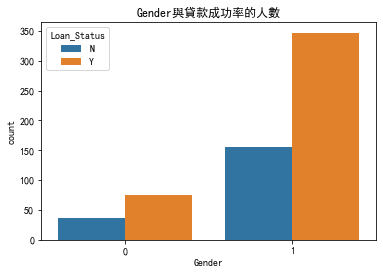

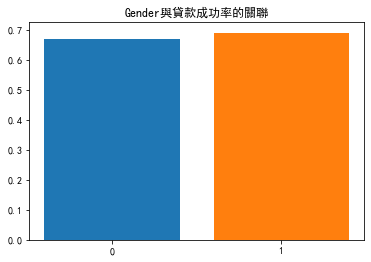

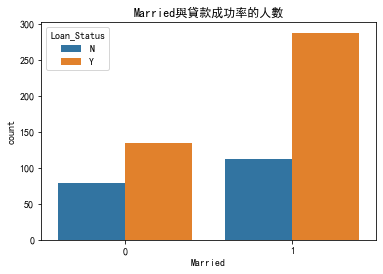

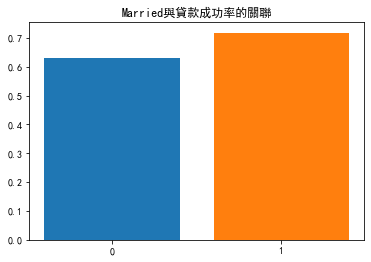

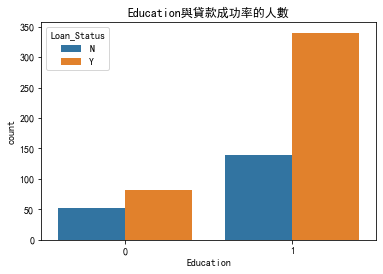

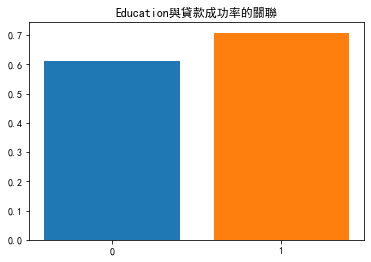

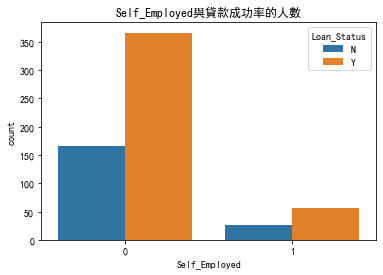

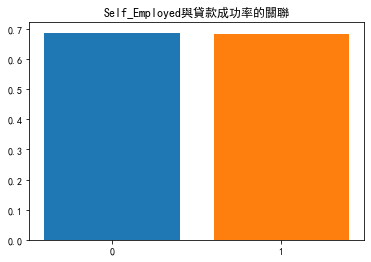

In [118]:
elements = ['Gender','Married','Education','Self_Employed']
for i in elements :
    fliter_pos = data[i] == '1'
    fliter_neg = data[i] == '0'
    fliter = data['Loan_Status'] == 'Y'
    pos = len(data[fliter_pos])
    neg = len(data[fliter_neg])
    pos_Y = len(data[(fliter_pos & fliter)])
    neg_Y = len(data[(fliter_neg & fliter)])
    rate_pos = pos_Y/pos
    rate_neg = neg_Y/neg
    plt.title('%s與貸款成功率的人數'  %(i))
    sns.countplot(x=data[i], hue=data['Loan_Status'])
    plt.show()
    plt.title('%s與貸款成功率的關聯'  %(i))
    plt.bar(x='0',height=rate_neg)
    plt.bar(x='1',height=rate_pos)
    plt.show()
    print()
    print()
    print()

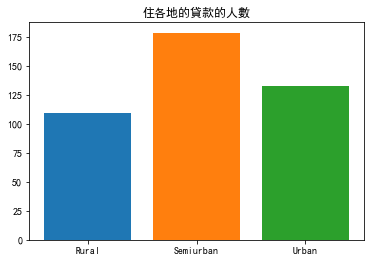

<BarContainer object of 3 artists>

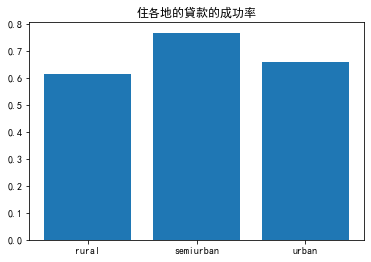

In [162]:
#Property_Area對貸款的影響
fliter = data['Loan_Status'] == 'Y'
fliter_rural = data['Property_AreaId'] == '0'
fliter_semiurban = data['Property_AreaId'] == '1'
fliter_urban = data['Property_AreaId'] == '2'
Rural = data[fliter_rural & fliter]
Semiurban = data[fliter_semiurban & fliter]
Urban = data[fliter_urban & fliter]
plt.title('住各地的貸款的人數')
plt.bar(x='Rural',height=len(Rural))
plt.bar(x='Semiurban',height=len(Semiurban))
plt.bar(x='Urban',height=len(Urban))
plt.show()
rural = len(data[fliter_rural])
semiurban = len(data[fliter_semiurban])
urban = len(data[fliter_urban])
x = [len(Rural)/rural,
     len(Semiurban)/semiurban,
     len(Urban)/urban]
plt.title('住各地的貸款的成功率')
plt.bar(x=['rural','semiurban','urban'],height=x)

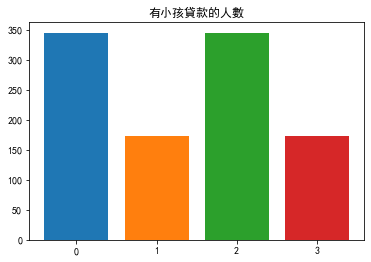

<BarContainer object of 4 artists>

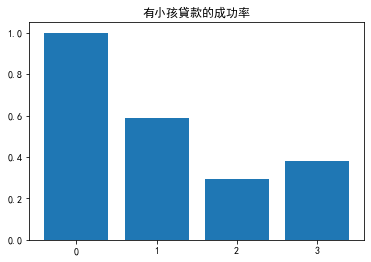

In [66]:
#dependent對貸款的影響
Dependents_0 = data[data['Dependents'] == 0 & fliter]
Dependents_1 = data[data['Dependents'] == 1 & fliter]
Dependents_2 = data[data['Dependents'] == 2 & fliter]
Dependents_3 = data[data['Dependents'] == 3 & fliter]
fliter = data['Loan_Status'] == 'Y'
plt.title('有小孩貸款的人數')
plt.bar(x='0',height=len(Dependents_0))
plt.bar(x='1',height=len(Dependents_1))
plt.bar(x='2',height=len(Dependents_2))
plt.bar(x='3',height=len(Dependents_3))
plt.show()
x = [len(data[data['Dependents'] == 0])/len(Dependents_0),
     len(data[data['Dependents'] == 1])/len(Dependents_1),
     len(data[data['Dependents'] == 2])/len(Dependents_2),
     len(data[data['Dependents'] == 3])/len(Dependents_3)]
plt.title('有小孩貸款的成功率')
plt.bar(x=['0','1','2','3'],height=x)

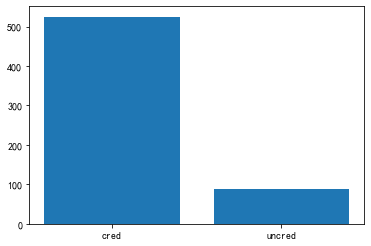

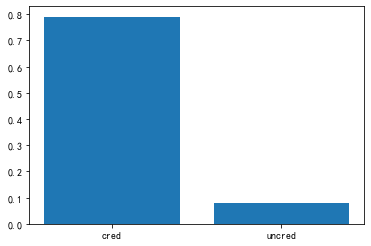

In [114]:
data['Credit_History'].value_counts()
Y = data['Loan_Status'] == 'Y'
fliter_cred = data['Credit_History'] == 1
fliter_uncred = data['Credit_History'] == 0
cred_Y = data[fliter_cred & Y]
uncred_Y = data[fliter_uncred & Y]
cred_rate = len(cred_Y)/len(data[fliter_cred])
uncred_rate = len(uncred_Y)/len(data[fliter_uncred])
plt.bar(x=['cred','uncred'],height=[len(data[fliter_cred]),len(data[fliter_uncred])])
plt.show()
plt.bar(x=['cred','uncred'],height=[cred_rate,uncred_rate])
plt.show()

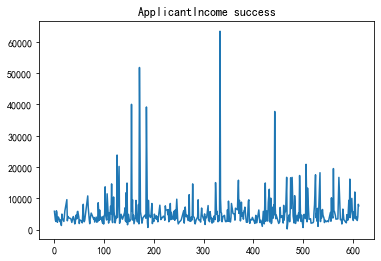

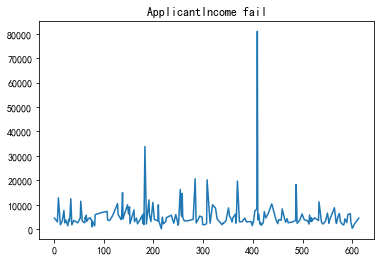

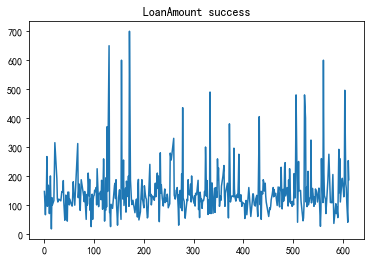

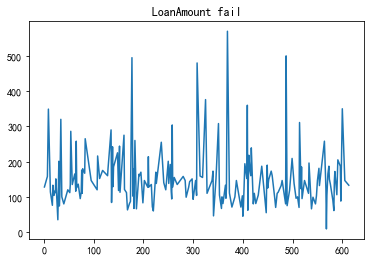

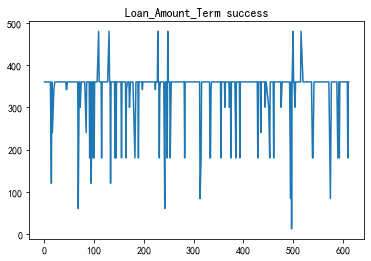

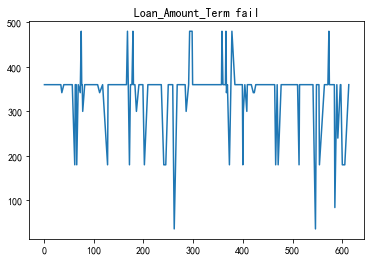

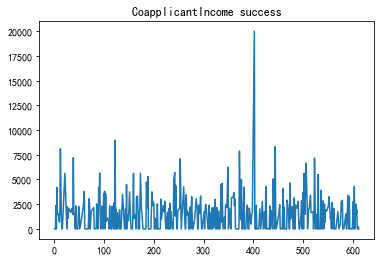

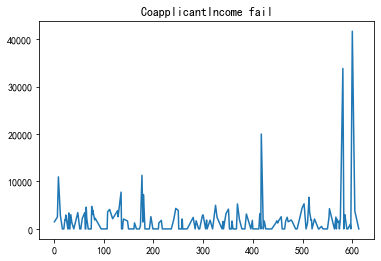

In [163]:
element = ['ApplicantIncome','LoanAmount','Loan_Amount_Term','CoapplicantIncome']
for i in element :
    Y = data[data['Loan_Status'] == 'Y']
    N = data[data['Loan_Status'] == 'N']
    data_Y = Y[i]
    data_N = N[i]
    plt.title('%s success'%(i))
    plt.plot(data_Y)
    plt.show()
    plt.title('%s fail'%(i))
    plt.plot(data_N)
    plt.show()
    print()
    print()

<BarContainer object of 2 artists>

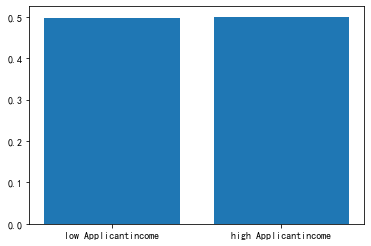

In [26]:
App_Y = data[data['Loan_Status']=='Y']
low_App = App_Y[App_Y['ApplicantIncome']<3812]
high_App = App_Y[App_Y['ApplicantIncome']>3812]
y1 = len(low_App)/len(App_Y)
y2 = len(high_App)/len(App_Y)
plt.bar(x=['low Applicantincome','high Applicantincome'],
        height=[y1,y2])

<BarContainer object of 2 artists>

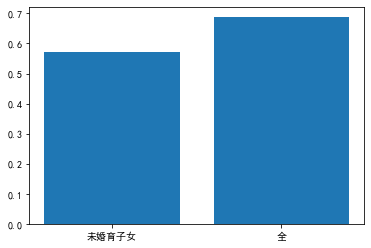

In [108]:
fliter_unmar_dep = data['unmar_dep'] == '1'
fliter = data['Loan_Status']=='Y'
unmar_dep = data[fliter_unmar_dep]
unmar_dep_Y = data[fliter_unmar_dep & fliter]
unmar_dep_rate = len(unmar_dep_Y)/len(unmar_dep)
Y = data[fliter]
Y_rate = len(Y)/len(data)
plt.bar(x=['未婚育子女','全'],height=[unmar_dep_rate,Y_rate])

<BarContainer object of 2 artists>

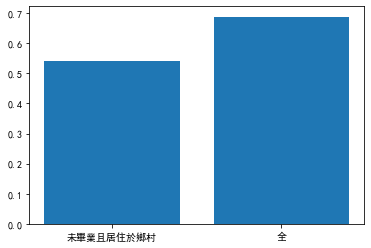

In [30]:
fliter_unedu_rural = data['unedu_rural'] == '1'
fliter = data['Loan_Status']=='Y'
unedu_rural = data[fliter_unedu_rural]
unedu_rural_Y = data[fliter_unedu_rural & fliter]
unedu_rural_rate = len(unedu_rural_Y)/len(unedu_rural)
Y = data[fliter]
Y_rate = len(Y)/len(data)
plt.bar(x=['未畢業且居住於鄉村','全'],height=[unedu_rural_rate,Y_rate])

In [236]:
a = data['Gender']=='0'
b = data['Married']=='1'
c = data['Dependents']==0
d = data['Education']=='1'
e = data['Self_Employed']=='0'
f = data['Property_AreaId']=='1'
z = data[b&f]
z_Y = z[z['Loan_Status']=='Y']
print(len(z_Y)/len(z))
q = data[data['Loan_Status']=='Y']
print(len(q)/len(data))

0.803921568627451
0.6872964169381107


In [201]:
len(z)

58

In [161]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Loan_ID            614 non-null    category
 1   Gender             614 non-null    category
 2   Married            614 non-null    category
 3   Dependents         614 non-null    int32   
 4   Education          614 non-null    category
 5   Self_Employed      614 non-null    category
 6   ApplicantIncome    614 non-null    int64   
 7   CoapplicantIncome  614 non-null    float64 
 8   LoanAmount         614 non-null    float64 
 9   Loan_Amount_Term   614 non-null    float64 
 10  Credit_History     614 non-null    int64   
 11  Property_Area      614 non-null    category
 12  Loan_Status        614 non-null    object  
 13  Property_AreaId    614 non-null    category
 14  unmar_dep          614 non-null    object  
 15  unedu_rural        614 non-null    object  
dtypes: categ

In [123]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Loan_ID            614 non-null    category
 1   Gender             614 non-null    category
 2   Married            614 non-null    category
 3   Dependents         614 non-null    int32   
 4   Education          614 non-null    category
 5   Self_Employed      614 non-null    category
 6   ApplicantIncome    614 non-null    int64   
 7   CoapplicantIncome  614 non-null    float64 
 8   LoanAmount         614 non-null    float64 
 9   Loan_Amount_Term   614 non-null    float64 
 10  Credit_History     614 non-null    int64   
 11  Property_Area      614 non-null    category
 12  Loan_Status        614 non-null    object  
 13  Property_AreaId    614 non-null    category
 14  unmar_dep          614 non-null    object  
dtypes: category(7), float64(3), int32(1), int64(2), object(2)

In [87]:
#自定義函式
#Dependents 缺失值取1
def standard(data) :
    gender = []
    for i in data["Gender"] :
        if i == 'Female' :
            gender.append('0')
        elif i == 'Male' :
            gender.append('1')
        else :
            gender.append(np.nan)
    data['Gender'] = gender

    married = []
    for i in data["Married"] :
        if i == 'No' :
            married.append('0')
        elif i == 'Yes' :
            married.append('1')
        else :
            married.append(np.nan)
    data['Married'] = married

    Edu = []
    for i in data["Education"] :
        if i == 'Graduate' :
            Edu.append('1')
        else :
            Edu.append('0')
    data['Education'] = Edu

    self_employee = []
    for i in data["Self_Employed"] :
        if i == 'Yes' :
            self_employee.append('1')
        elif i == 'No' :
            self_employee.append('0')
        else :
            self_employee.append(np.nan)
    data["Self_Employed"] = self_employee

    area = []
    for i in data["Property_Area"] :
        if i == 'Urban' :
            area.append('2')
        elif i == 'Semiurban' :
            area.append('1')
        else :
            area.append('0')
    data["Property_AreaId"] = area

    dep = []
    for i in data["Dependents"] :
        if i == '0' :
            dep.append(0)
        elif i == '1' :
            dep.append(1)
        elif i == '2' :
            dep.append(2)
        else :
            dep.append(3)
    data["Dependents"] = dep

    his = []
    for i in data["Credit_History"] :
        if i == 1.0 :
            his.append(1)
        elif i == 0.0 :
            his.append(0)
        else :
            his.append(1)
    data["Credit_History"] = his
    
    #未婚育兒的失敗率較高
    unmar_dep = []
    for i in data['Married'] :
        if i == '0' :
            unmar_dep.append('1')
        else :
            unmar_dep.append('0')
    for i in range(len(data['Dependents'])) :
        if data['Dependents'].loc[i] == 0 :
            unmar_dep[i] = '0'
    data['unmar_dep'] = unmar_dep

    #未畢業居住鄉村的失敗率較高
    unedu_rural = []
    for i in data['Education'] :
        if i == '0' :
            unedu_rural.append('1')
        else :
            unedu_rural.append('0')
    for i in range(len(data['Property_AreaId'])) :
        if data['Property_AreaId'].loc[i] == '1' or data['Property_AreaId'].loc[i] == '2' :
            unedu_rural[i] = '0'
    data['unedu_rural'] = unedu_rural
    
    #結婚住郊區成功率高
    marr_sub = []
    mar = data['Married']=='1'
    sub = data['Property_AreaId']=='1'
    dataset = data[mar & sub]
    Loan_ID = []
    for i in dataset['Loan_ID'] :
        Loan_ID.append(i)
    for i in data['Loan_ID'] :
        if i not in Loan_ID :
            marr_sub.append('0')
        else :
            marr_sub.append('1')
    data['marr_sub'] = marr_sub

    data['Loan_ID'] = data['Loan_ID'].astype('category')
    data['Gender'] = data['Gender'].astype('category')
    data['Married'] = data['Married'].astype('category')
    data['Dependents'] = data['Dependents'].astype(int)
    data['Education'] = data['Education'].astype(int)
    data['Self_Employed'] = data['Self_Employed'].astype('category')
    data['Property_Area'] = data['Property_Area'].astype('category')
    data['Property_AreaId'] = data['Property_AreaId'].astype('category')

    #處理Gender的缺失值
    data['Gender'] = data['Gender'].fillna('1')

    #處理Married的缺失值
    data['Married'] = data['Married'].fillna('1')


    #缺失值取1
    data['Dependents'] = data['Dependents'].fillna(data['Dependents'].mean())

    #處理Self_Employed的缺失值
    data['Self_Employed'] = data['Self_Employed'].fillna('0')

    #處理loan amount 的缺失值
    #取平均值
    data['LoanAmount'] = data['LoanAmount'].fillna(data['LoanAmount'].mean())

    #處理Loan_Amount_Term缺失值
    #取平均值
    data['Loan_Amount_Term'] = data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mean())

    #處理Credit_History缺失值
    #取1
    data['Credit_History'] = data['Credit_History'].fillna('1')

In [168]:
test = pd.read_csv("C:/Users/asd11/OneDrive/桌面/貸款模型預測/test_lAUu6dG.csv")
train = pd.read_csv("C:/Users/asd11/OneDrive/桌面/貸款模型預測/train_ctrUa4K.csv")

In [169]:
standard(train)
standard(test)

In [171]:
train = train.drop(['Property_Area'],axis=1)
test = test.drop(['Property_Area'],axis=1)

In [172]:
train_y = train['Loan_Status']
train_X = train.drop(['Loan_Status','Loan_ID'],axis=1)
Id = test['Loan_ID']
test = test.drop(['Loan_ID'],axis=1)

In [173]:
from sklearn.ensemble import RandomForestClassifier
 
model = RandomForestClassifier(criterion='gini', 
                             n_estimators=1000,
                             min_samples_split=12,
                             min_samples_leaf=1,
                             oob_score=True,
                             random_state=1,
                             n_jobs=-1) 

model.fit(train_X,train_y)
pred = model.predict(test)

In [174]:
output = pd.DataFrame({'Loan_ID': Id,
                       'Loan_Status': pred})
output.to_csv('submission.csv', index=False)